In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from scipy import stats as st
from sklearn.model_selection import cross_val_score

In [2]:
url=r"D:\cp\DataSet\Bengaluru_House_Data.csv"
df=pd.read_csv(url)

In [3]:
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
7973,Built-up Area,Ready To Move,Whitefield,2 BHK,NaN,1290,2.0,0.0,90.00
4907,Built-up Area,Ready To Move,Outer Ring Road East,2 BHK,Hoens T,1367,2.0,2.0,62.00
11273,Super built-up Area,18-Sep,Varthur,2 BHK,Soamsay,1210,2.0,1.0,64.15
11838,Plot Area,Ready To Move,Ullal Uppanagar,2 Bedroom,NaN,1200,2.0,0.0,82.00
4865,Built-up Area,18-Aug,Electronic City Phase II,3 BHK,Sryalan,1310,2.0,1.0,37.83


## EDA

In [4]:
df.shape

(13320, 9)

In [5]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df['area_type'].isnull().sum()

0

In [7]:
df['availability'].unique()   #seems unnecessary column 

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [8]:
df.drop(columns=['availability'],inplace=True)

In [9]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [10]:
df['location'].isnull().sum()  

1

In [11]:
df=df[~df['location'].isna()]  #As there are only one null value its better to remove

In [12]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [13]:
(df['location'].value_counts()<=10).sum() #there lots of location with very few houses

1064

In [14]:
location_count=df.groupby('location')['location'].count()
location_count

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1305, dtype: int64

In [15]:
location_lessthan_10=location_count[location_count<=10].index

In [16]:
location_lessthan_10

Index([' Anekal', ' Banaswadi', ' Basavangudi', ' Bhoganhalli',
       ' Devarabeesana Halli', ' Electronic City', ' Mysore Highway',
       ' Rachenahalli', ' Sector 1 HSR Layout', ' Thanisandra',
       ...
       'rr nagar', 'sankeswari', 'sapthagiri Layout', 'sarjapura main road',
       'singapura paradise', 't.c palya', 'tc.palya', 'vinayakanagar',
       'white field,kadugodi', 'whitefiled'],
      dtype='object', name='location', length=1064)

In [17]:
df['location']=df['location'].apply(lambda x: 'other' if x in location_lessthan_10 else x)

In [18]:
df['size']     #Its better to keep only numeric value

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13319, dtype: object

In [19]:
df['size'].isna().sum()   

16

In [20]:
df=df[~df['size'].isna()]  #As the number of null value is very less its better to remove

In [21]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [22]:
df['size']=df['size'].apply(lambda x: x.split(' ')[0])

In [23]:
df['size']=df['size'].astype('int')

In [24]:
df['society']

0        Coomee 
1        Theanmp
2            NaN
3        Soiewre
4            NaN
          ...   
13315    ArsiaEx
13316        NaN
13317    Mahla T
13318    SollyCl
13319        NaN
Name: society, Length: 13303, dtype: object

In [25]:
df['society'].isna().sum()   #almost 50% values are null in this column

5499

In [26]:
df.drop(columns=['society'],inplace=True)

In [27]:
df['total_sqft'].sample(20)   #run this cell 5 6 time to see pattern in data

1826     1115
11121    1200
3608      596
1587     1378
2804     1200
11429    1226
9238     1169
9947      770
1084     1600
12217    1276
4952     1847
6196     1060
6660     1186
10364    1847
8448     1130
11497    1500
3640     1327
3474     1231
1343      890
8199     1424
Name: total_sqft, dtype: object

In [28]:
#  188.89Sq. Yards ,697Sq. Meter,1248.52,2466 - 2856 these type of data are also there in this column

In [29]:
def clean_total_sqft(x):
    
    try:
        return float(x)
    except:
        pass
    
    try:
        return (float(x.split(' - ')[0])+float(x.split(' - ')[1]))//2;
    except:
        pass
    
    try:
        return float(x.split('Sq')[0])
    except:
        pass
    
    return np.nan
    
    
    

In [30]:
df['total_sqft']=df['total_sqft'].apply(clean_total_sqft)

In [31]:
df['total_sqft'].isna().sum()

14

In [32]:
df=df[~df['total_sqft'].isna()]

In [33]:
df['total_sqft']=df['total_sqft'].astype(int)

In [34]:
df['bath'].isna().sum()

57

In [35]:
df=df[~df.bath.isna()]

In [36]:
df.bath=df.bath.astype(int)

In [37]:
df['balcony'].isna().sum()  #number of null value is almost 5%

535

In [38]:
df['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [39]:
non_na_balcony=df[~df['balcony'].isna()]['balcony'].astype(int)
non_na_balcony.unique()

array([1, 3, 2, 0])

C:\Users\91993\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balcony', ylabel='count'>

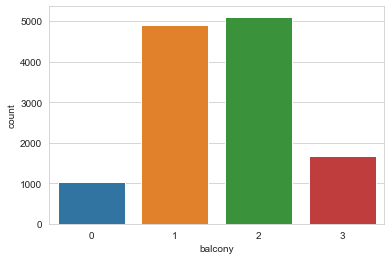

In [40]:
sns.countplot(non_na_balcony)

In [41]:
df['balcony'].fillna(2,inplace=True)

In [42]:
df.isna().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [43]:
df.shape

(13232, 7)

In [44]:
df

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600,5,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440,2,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521,3,1.0,95.00
4,Super built-up Area,Kothanur,2,1200,2,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5,3453,4,0.0,231.00
13316,Super built-up Area,other,4,3600,5,2.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2,1141,2,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4,4689,4,1.0,488.00


<AxesSubplot:xlabel='area_type', ylabel='price'>

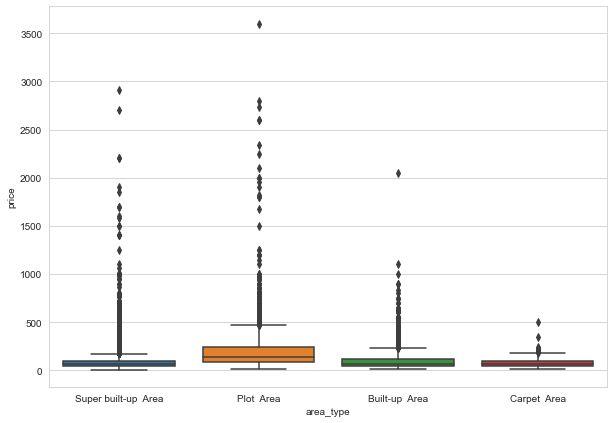

In [45]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='area_type',y='price',data=df)

### Univariate Analysis on area_type

<AxesSubplot:xlabel='area_type', ylabel='price'>

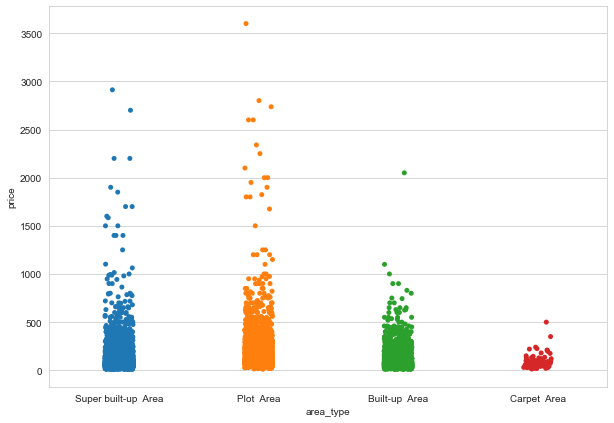

In [46]:
plt.figure(figsize=(10, 7))
sns.stripplot(x='area_type',y='price',data=df)

<AxesSubplot:xlabel='area_type', ylabel='price'>

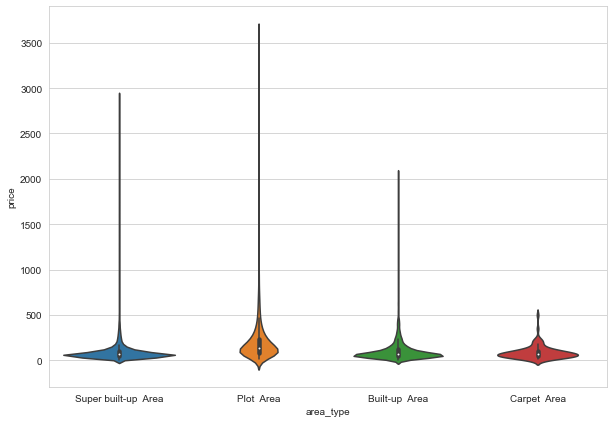

In [47]:
plt.figure(figsize=(10, 7))
sns.violinplot(x='area_type',y='price',data=df)

In [48]:
df.drop(columns=['area_type'],inplace=True)

### Univariate Analysis on size

<AxesSubplot:xlabel='size', ylabel='count'>

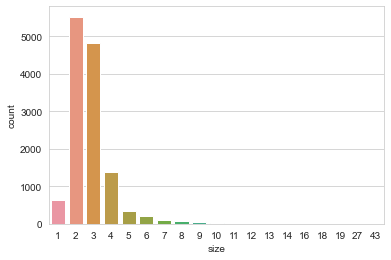

In [49]:
sns.countplot(x=df['size'])

<AxesSubplot:xlabel='size'>

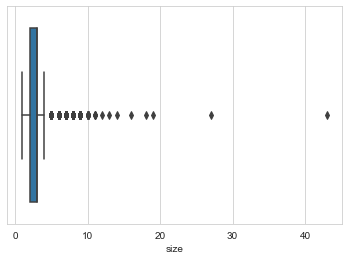

In [50]:
sns.boxplot(x=df['size'])

In [51]:
p25=np.percentile(df['size'],25)
p75=np.percentile(df['size'],75)
IQR=p75-p25

In [52]:
mx_size=p75+1.5*IQR
mn_size=p25-1.5*IQR

In [53]:
mx_size

4.5

In [54]:
df=df[df['size']<=5]   #Trimming Outlier

In [55]:
df.shape

(12745, 6)

### Univariate Analysis on total_sqft

In [56]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056,2,1.0,39.07
1,Chikka Tirupathi,4,2600,5,3.0,120.00
2,Uttarahalli,3,1440,2,3.0,62.00
3,Lingadheeranahalli,3,1521,3,1.0,95.00
4,Kothanur,2,1200,2,1.0,51.00


<AxesSubplot:xlabel='total_sqft', ylabel='Density'>

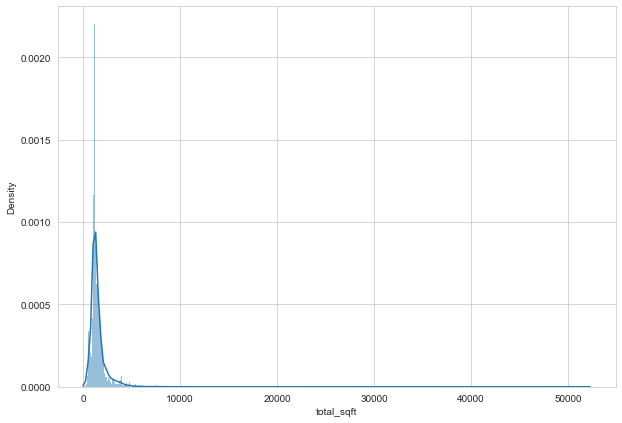

In [57]:
plt.figure(figsize=(10, 7))
sns.histplot(df['total_sqft'],kde=True,stat='density')   #Distribution is Right Skewed

<AxesSubplot:xlabel='total_sqft'>

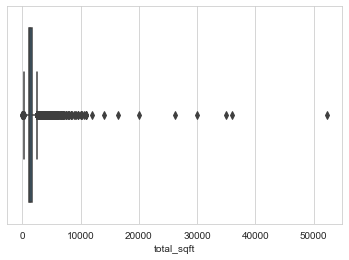

In [58]:
sns.boxplot(x=df['total_sqft'])

In [59]:
p25=np.percentile(df['total_sqft'],25)
p75=np.percentile(df['total_sqft'],75)
IQR=p75-p25

In [60]:
mn_sqft=p25-1.5*IQR
mx_sqft=p75+1.5*IQR

In [61]:
mn_sqft,mx_sqft

(273.5, 2477.5)

In [62]:
df[df['total_sqft']<mn_sqft].shape

(26, 6)

In [63]:
df=df[df['total_sqft']>=mn_sqft]

In [64]:
df[df['total_sqft']>mx_sqft].shape  #we cant simply remove 10% row ,so its better to cap rather than trim

(1109, 6)

In [65]:
df.loc[df['total_sqft']>mx_sqft,'total_sqft']=mx_sqft

### Univariate Analysis on bath

<AxesSubplot:xlabel='bath', ylabel='count'>

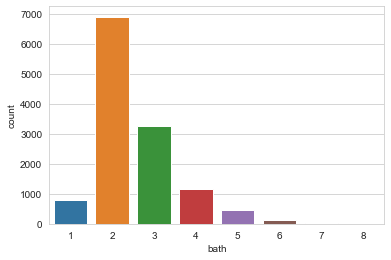

In [66]:
sns.countplot(x=df['bath'])

<AxesSubplot:xlabel='bath'>

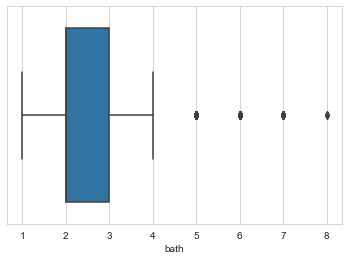

In [67]:
sns.boxplot(x=df['bath'])

In [68]:
df.loc[df['bath']>4,'bath']=4   #capping the outliers

### Univariate Analysis on balcony

<AxesSubplot:xlabel='balcony', ylabel='count'>

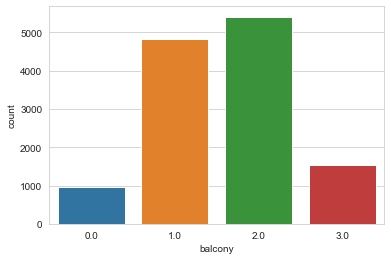

In [69]:
sns.countplot(x=df['balcony'])

<AxesSubplot:xlabel='balcony'>

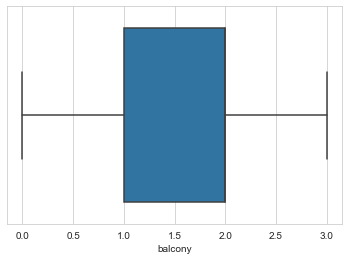

In [70]:
sns.boxplot(x=df['balcony'])

## Bivariate Analysis

In [71]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056.0,2,1.0,39.07
1,Chikka Tirupathi,4,2477.5,4,3.0,120.00
2,Uttarahalli,3,1440.0,2,3.0,62.00
3,Lingadheeranahalli,3,1521.0,3,1.0,95.00
4,Kothanur,2,1200.0,2,1.0,51.00


In [72]:
df.shape

(12719, 6)

In [73]:
df

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056.0,2,1.0,39.07
1,Chikka Tirupathi,4,2477.5,4,3.0,120.00
2,Uttarahalli,3,1440.0,2,3.0,62.00
3,Lingadheeranahalli,3,1521.0,3,1.0,95.00
4,Kothanur,2,1200.0,2,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5,2477.5,4,0.0,231.00
13316,other,4,2477.5,4,2.0,400.00
13317,Raja Rajeshwari Nagar,2,1141.0,2,1.0,60.00
13318,Padmanabhanagar,4,2477.5,4,1.0,488.00


##### size v/s Price

<AxesSubplot:xlabel='size', ylabel='price'>

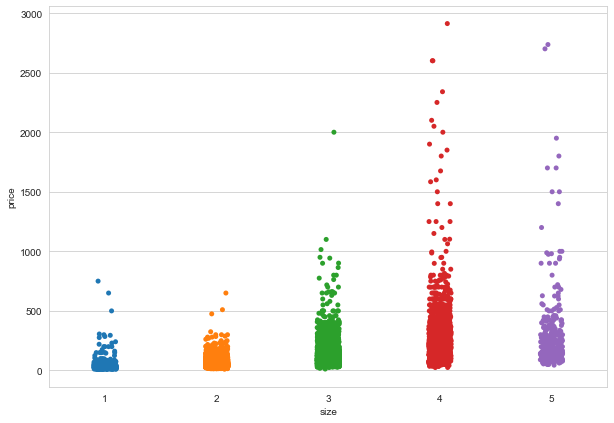

In [74]:
plt.figure(figsize=(10,7))
sns.stripplot(x='size',y='price',data=df)

<AxesSubplot:xlabel='size', ylabel='price'>

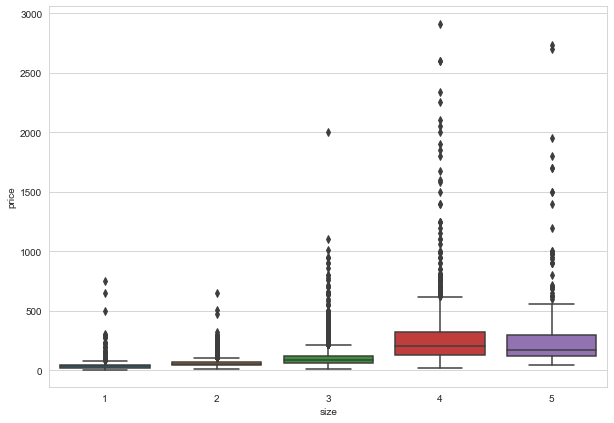

In [75]:
plt.figure(figsize=(10,7))
sns.boxplot(x='size',y='price',data=df)

<AxesSubplot:xlabel='bath', ylabel='price'>

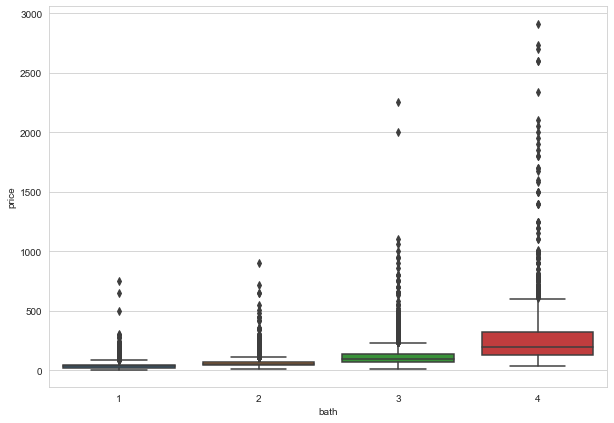

In [76]:
plt.figure(figsize=(10,7))
sns.boxplot(x='bath',y='price',data=df)

### Size v/s Bath

<AxesSubplot:xlabel='size', ylabel='bath'>

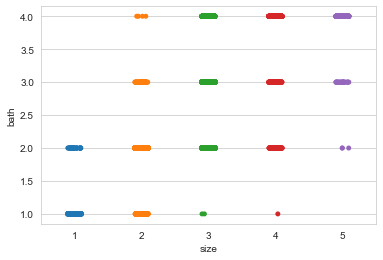

In [77]:
sns.stripplot(x=df['size'],y=df['bath'])       #its very rare that no of bath greater than size

In [78]:
df[df['size']<df['bath']]                    #its very rare that no of bath greater than size

,location,size,total_sqft,bath,balcony,price
18,other,3,2477.5,4,2.0,290.00
84,EPIP Zone,3,1499.0,4,2.0,102.00
119,Hennur Road,2,276.0,3,3.0,23.00
150,Mysore Road,3,1710.0,4,2.0,91.31
153,other,3,2477.5,4,2.0,235.00
...,...,...,...,...,...,...
12931,Kammanahalli,2,1200.0,3,2.0,80.00
12980,Yelahanka,2,1267.0,3,1.0,78.00
13048,Sarjapur Road,3,1984.0,4,1.0,148.00
13229,Ambedkar Nagar,3,2395.0,4,2.0,150.00


In [79]:
df=df[df['size']>=df['bath']]   #removed

<AxesSubplot:xlabel='size', ylabel='count'>

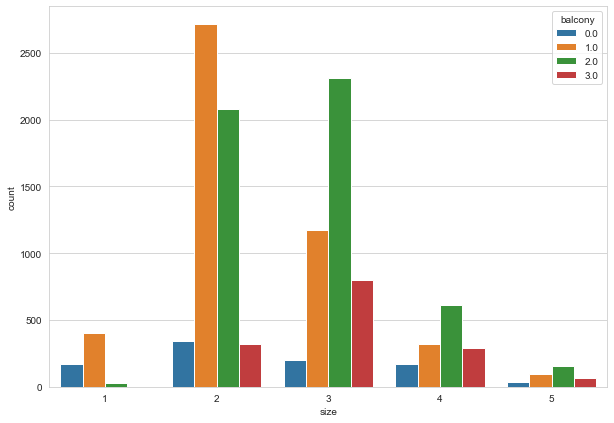

In [80]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['size'],hue=df['balcony'])       #its very rare that no of bath greater than size

In [81]:
df[df['size']<df['balcony']]  #its very rare that no of balcony greater than size

,location,size,total_sqft,bath,balcony,price
66,Gunjur,2,1140.0,2,3.0,43.0
76,Kalena Agrahara,2,1150.0,2,3.0,40.0
94,Thanisandra,2,1296.0,2,3.0,80.0
178,Malleshwaram,1,705.0,1,2.0,67.0
180,Hulimavu,2,1242.0,2,3.0,51.0
...,...,...,...,...,...,...
13098,Sanjay nagar,2,1180.0,2,3.0,80.0
13139,Nagarbhavi,2,1225.0,2,3.0,58.0
13238,other,2,1200.0,2,3.0,70.0
13253,Old Madras Road,2,1211.0,2,3.0,45.0


In [82]:
df=df[df['size']>=df['balcony']]

In [83]:
df

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056.0,2,1.0,39.07
1,Chikka Tirupathi,4,2477.5,4,3.0,120.00
2,Uttarahalli,3,1440.0,2,3.0,62.00
3,Lingadheeranahalli,3,1521.0,3,1.0,95.00
4,Kothanur,2,1200.0,2,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5,2477.5,4,0.0,231.00
13316,other,4,2477.5,4,2.0,400.00
13317,Raja Rajeshwari Nagar,2,1141.0,2,1.0,60.00
13318,Padmanabhanagar,4,2477.5,4,1.0,488.00


### Introducing two more column sqft_per_room and price_per_sqft

In [84]:
df['sqft_per_room']=round(df['total_sqft']/df['size'],0)

In [85]:
df['price_per_sqft']=round(df['price']*100000/df['total_sqft'],0) #prices are in lakhs

<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

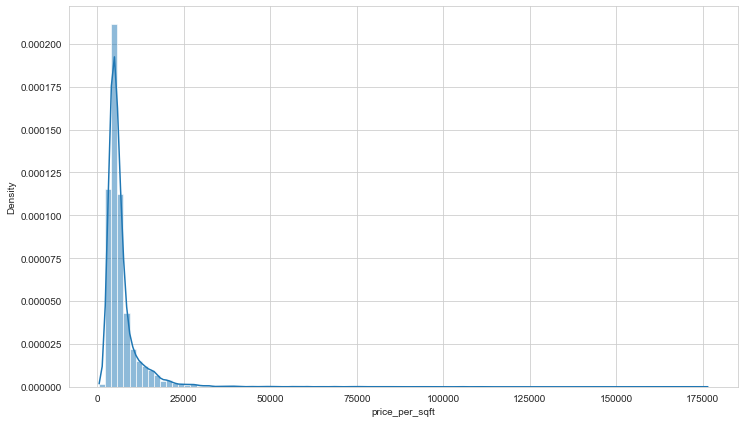

In [86]:
plt.figure(figsize=(12,7))
sns.histplot(x=df['price_per_sqft'],kde=True,stat='density',bins=100) #right skewed bell curve

<AxesSubplot:xlabel='price_per_sqft'>

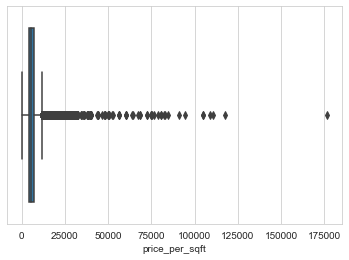

In [87]:
sns.boxplot(x=df['price_per_sqft'])

In [88]:
p75=np.percentile(df['price_per_sqft'],75)
p25=np.percentile(df['price_per_sqft'],25)
IQR=p75-p25
mx=p75+1.5*IQR

In [89]:
df=df[df['price_per_sqft']<=mx]

<AxesSubplot:xlabel='sqft_per_room', ylabel='Density'>

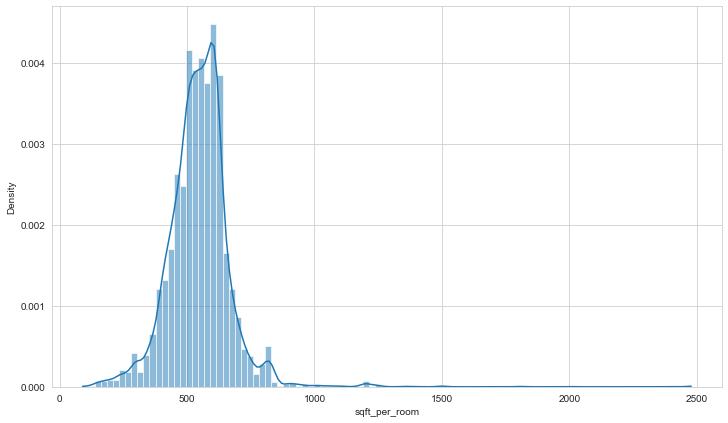

In [90]:
plt.figure(figsize=(12,7))
sns.histplot(x=df['sqft_per_room'],kde=True,stat='density',bins=100) #bell curve

In [91]:
var=np.var(df['sqft_per_room'])
var

15779.724755571706

In [92]:
sd=pow(var,0.5)
sd

125.61737441760079

In [93]:
np.mean(df['sqft_per_room']),np.median(df['sqft_per_room']),st.mode(df['sqft_per_room'])  #almost normal distribution is there 

(548.5366878267364, 550.0, ModeResult(mode=array([600.]), count=array([436])))

In [94]:
z_score=(df['sqft_per_room']-np.mean(df['sqft_per_room']))/sd

In [95]:
df=df[np.logical_or(z_score>=-3,z_score<=3)] #removing all those row whose z_score value <-3 or >3

In [96]:
df.drop(columns=['sqft_per_room','price_per_sqft'],inplace=True)

## Model Training

In [97]:
dummies=pd.get_dummies(df['location'])
dummies.drop(columns=['other'],inplace=True)

In [98]:
location=dummies.columns.values

In [99]:
location

array([' Devarachikkanahalli', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout',
       'Abbigere', 'Akshaya Nagar', 'Ambalipura', 'Ambedkar Nagar',
       'Amruthahalli', 'Anandapura', 'Ananth Nagar', 'Anekal',
       'Anjanapura', 'Ardendale', 'Arekere', 'Attibele', 'BEML Layout',
       'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya', 'Badavala Nagar',
       'Balagere', 'Banashankari', 'Banashankari Stage II',
       'Banashankari Stage III', 'Banashankari Stage V',
       'Banashankari Stage VI', 'Banaswadi', 'Banjara Layout',
       'Bannerghatta', 'Bannerghatta Road', 'Basavangudi',
       'Basaveshwara Nagar', 'Battarahalli', 'Begur', 'Begur Road',
       'Bellandur', 'Benson Town', 'Bharathi Nagar', 'Bhoganhalli',
       'Billekahalli', 'Binny Pete', 'Bisuva

In [100]:
df

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056.0,2,1.0,39.07
1,Chikka Tirupathi,4,2477.5,4,3.0,120.00
2,Uttarahalli,3,1440.0,2,3.0,62.00
3,Lingadheeranahalli,3,1521.0,3,1.0,95.00
4,Kothanur,2,1200.0,2,1.0,51.00
...,...,...,...,...,...,...
13313,Uttarahalli,3,1345.0,2,1.0,57.00
13314,Green Glen Layout,3,1715.0,3,3.0,112.00
13315,Whitefield,5,2477.5,4,0.0,231.00
13317,Raja Rajeshwari Nagar,2,1141.0,2,1.0,60.00


In [101]:
df.drop(columns=['location'],inplace=True)

In [102]:
df=pd.concat([df,dummies],axis=1)

In [103]:
# df.drop(columns=['balcony'],inplace=True)

In [104]:
y=df['price']
x=df.drop(columns=['price'])
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [105]:
y_test

12361     25.40
2061      53.35
4876      19.50
6173      55.00
10534    175.00
          ...  
13292     63.93
11869     78.00
5902      58.00
12915     61.00
12190     44.00
Name: price, Length: 2678, dtype: float64

In [106]:
lr=LinearRegression()

In [107]:
lr.fit(x_train,y_train)

LinearRegression()

In [108]:
lr.score(x_train,y_train)

0.7388623514025343

In [109]:
lr.score(x_test,y_test)

0.7252253530883657

In [110]:
trans=ColumnTransformer([
    ('t1',StandardScaler(),[0,1,2,3])
],remainder='passthrough')

In [111]:
pipe=Pipeline([
    ('p1',trans),
    ('p2',LinearRegression())
])

In [112]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('p1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('t1', StandardScaler(),
                                                  [0, 1, 2, 3])])),
                ('p2', LinearRegression())])

In [113]:
r2_score(y_train,pipe.predict(x_train))

0.7388623514025343

In [116]:
cross_val_score(pipe,x_train,y_train)

array([ 7.14944208e-01,  7.21263392e-01,  7.10024464e-01,  7.30898322e-01,
       -3.82799698e+18])

In [115]:
r2_score(y_test,pipe.predict(x_test))

0.7252253530883521